In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('TeamX-Data_With_Model.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Campaign name         8336 non-null   object 
 1   Country               8336 non-null   object 
 2   Day                   8336 non-null   object 
 3   Ad Set Name           8336 non-null   object 
 4   Ad name               8336 non-null   object 
 5   Objective             8336 non-null   object 
 6   Reach                 8336 non-null   int64  
 7   Impressions           8336 non-null   int64  
 8   Amount spent (USD)    8336 non-null   float64
 9   Link clicks           3195 non-null   float64
 10  Clicks (all)          8336 non-null   int64  
 11  Page engagement       3784 non-null   float64
 12  3-second video plays  1237 non-null   float64
 13  Video plays at 25%    1067 non-null   float64
 14  Video plays at 50%    960 non-null    float64
 15  Video plays at 75%   

In [4]:
df['Objective'].value_counts()

LINK_CLICKS          5734
LEAD_GENERATION      1318
BRAND_AWARENESS       450
OUTCOME_AWARENESS     411
VIDEO_VIEWS           372
REACH                  51
Name: Objective, dtype: int64

In [8]:
phase=[]

for objective in df['Objective']:

    if objective == 'LINK_CLICKS':
        phase.append('Consideration')

    elif objective == 'LEAD_GENERATION' :
        phase.append('Decision')

    elif objective == 'BRAND_AWARENESS' or objective == 'OUTCOME_AWARENESS' or objective == 'VIDEO_VIEWS' or objective == 'REACH':
        phase.append('Awareness')

    else:
        phase.append(None)

df['phase']=phase
df['phase'].value_counts()

Consideration    5734
Decision         1318
Awareness        1284
Name: phase, dtype: int64

In [57]:
df_no_zeroes= df[df['Amount spent (USD)'] > 0]
df_no_zeroes.shape

(5732, 34)

In [58]:
df_no_zeroes= df_no_zeroes.sort_values(by=['Day'])
df_no_zeroes

,Campaign name,Country,Day,Ad Set Name,Ad name,Objective,Reach,Impressions,Amount spent (USD),Link clicks,...,Post reactions,Leads,Video plays,Reporting starts,Reporting ends,Model,phase,phase_Awareness,phase_Consideration,phase_Decision
4097,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Instagram_EN|...,OM,2022-01-03,Interest|Behavior_LPV_Al Ain_AR_IG-Story,Video_IG_Al Ain_AR,LINK_CLICKS,30,30,0.31,NaN,...,NaN,NaN,29.0,01/03/2022,01/03/2022,Maybach,Consideration,0,1,0
4103,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Instagram_EN|...,AE,2022-01-03,Interest|Behavior_LPV_AUH_EN_IG-Feed,Carousel_IG_AUH_EN,LINK_CLICKS,10636,11695,33.46,12.0,...,23.0,NaN,NaN,01/03/2022,01/03/2022,Maybach,Consideration,0,1,0
4101,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Facebook_EN|A...,OM,2022-01-03,Interest|Behavior_LPV_Al Ain_AR_FB-Feed,Carousel_FB_Al Ain_AR,LINK_CLICKS,16,37,0.05,NaN,...,NaN,NaN,NaN,01/03/2022,01/03/2022,Maybach,Consideration,0,1,0
4100,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Instagram_EN|...,AE,2022-01-03,Interest|Behavior_LPV_Al Ain_EN_IG-Feed,Carousel_IG_Al Ain_EN,LINK_CLICKS,6910,8400,42.61,9.0,...,7.0,NaN,NaN,01/03/2022,01/03/2022,Maybach,Consideration,0,1,0
4091,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Instagram_EN|...,OM,2022-01-03,Interest|Behavior_LPV_Al Ain_EN_IG-Feed,Carousel_IG_Al Ain_EN,LINK_CLICKS,62,62,0.33,NaN,...,1.0,NaN,NaN,01/03/2022,01/03/2022,Maybach,Consideration,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,OWRT_OVS_AUH_RNG_CONS_AOB_B.OR.2022.OR-Brandin...,AE,2022-12-29,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AUH_EN,CARO_AUH_EN,LINK_CLICKS,66224,89041,100.24,416.0,...,35.0,NaN,NaN,29/12/2022,29/12/2022,NaN,Consideration,0,1,0
8114,OWRT_OVS_AUH_RNG_CONS_AOB_B.OR.2022.OR-Brandin...,AE,2022-12-29,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AlAin_EN,CARO_AlAin_EN,LINK_CLICKS,21772,28839,30.23,128.0,...,14.0,NaN,NaN,29/12/2022,29/12/2022,NaN,Consideration,0,1,0
8112,OWRT_OVS_AUH_RNG_CONS_AOB_B.OR.2022.OR-Brandin...,OM,2022-12-30,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AlAin_EN,CARO_AlAin_EN,LINK_CLICKS,75,75,0.08,1.0,...,NaN,NaN,NaN,30/12/2022,30/12/2022,NaN,Consideration,0,1,0
8111,OWRT_OVS_AUH_RNG_CONS_AOB_B.OR.2022.OR-Brandin...,AE,2022-12-30,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AUH_EN,CARO_AUH_EN,LINK_CLICKS,63696,89423,84.57,496.0,...,37.0,NaN,NaN,30/12/2022,30/12/2022,NaN,Consideration,0,1,0


In [11]:
df=df.sort_values(by=['Day'])
df

,Campaign name,Country,Day,Ad Set Name,Ad name,Objective,Reach,Impressions,Amount spent (USD),Link clicks,...,Post comments,Post shares,Post saves,Post reactions,Leads,Video plays,Reporting starts,Reporting ends,Model,phase
4761,EMC_Always On_Reach_1159361|1732565,unknown,01/01/2022,B.C.2021.Sustainability.AO_Facebook-Instagram_...,B.C.2021.Sustainability.AO_CARO_S 580_FBIG_EN,REACH,0,0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022,01/01/2022,Maybach,Awareness
4760,EMC_Always On_Reach_1159361|1732565,unknown,01/01/2022,B.C.2021.Sustainability.AO_Facebook-Instagram_...,B.C.2021.Sustainability.AO_CARO_S 580_FBIG_AR,REACH,0,0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022,01/01/2022,Maybach,Awareness
4098,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Instagram_EN|...,unknown,01/03/2022,Interest|Behavior_LPV_Al Ain_AR_IG-Story,Video_IG_Al Ain_AR,LINK_CLICKS,0,0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01/03/2022,01/03/2022,Maybach,Consideration
4097,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Instagram_EN|...,OM,01/03/2022,Interest|Behavior_LPV_Al Ain_AR_IG-Story,Video_IG_Al Ain_AR,LINK_CLICKS,30,30,0.31,NaN,...,NaN,NaN,NaN,NaN,NaN,29.0,01/03/2022,01/03/2022,Maybach,Consideration
4116,EMC_PSGC_AUH-AlAin_CONS_S 580_Q1_Facebook_EN|A...,AE,01/03/2022,Interest|Behavior_LPV_AUH_EN_FB-Feed,Carousel_FB_AUH_EN,LINK_CLICKS,29431,47931,52.61,118.0,...,NaN,NaN,NaN,6.0,NaN,NaN,01/03/2022,01/03/2022,Maybach,Consideration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,OWRT_OVS_AUH|AlAin_RNG_CONS_AOP_U.OR.NA.T_Face...,EG,31/10/2022,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AUH_EN,CARO_AUH_EN,LINK_CLICKS,7,7,0.02,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,31/10/2022,31/10/2022,NaN,Consideration
5999,OWRT_OVS_AUH|AlAin_RNG_CONS_AOP_U.OR.NA.T_Face...,PH,31/10/2022,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AUH_EN,CARO_AUH_EN,LINK_CLICKS,0,8,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31/10/2022,31/10/2022,NaN,Consideration
6000,OWRT_OVS_AUH|AlAin_RNG_CONS_AOP_U.OR.NA.T_Face...,PK,31/10/2022,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_AUH_EN,CARO_AUH_EN,LINK_CLICKS,0,10,0.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31/10/2022,31/10/2022,NaN,Consideration
6028,PSGC_OVS_AUH|Al Ain_STD-RNG-EQ_CONS_LTC_B.C.20...,AE,31/10/2022,FB-IG_TRAFF_LNKCL_LPRM_BEHVR+INT_FBIG-F_Al Ain...,CARO_EQS_FB|IG_Feed_Al Ain_EN,LINK_CLICKS,17,19,0.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31/10/2022,31/10/2022,EQ,Consideration


## Simple distribution plotting and boxplots

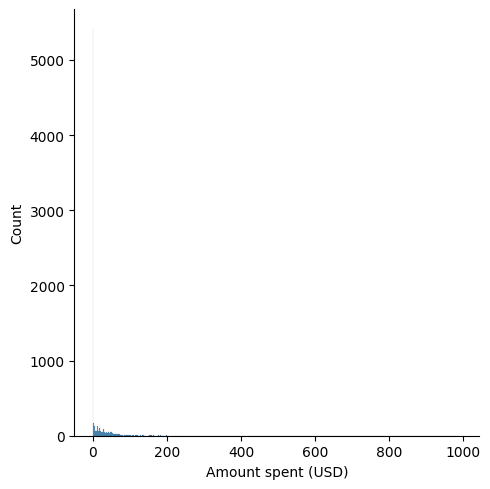

In [14]:
sns.displot(x=df['Amount spent (USD)'])

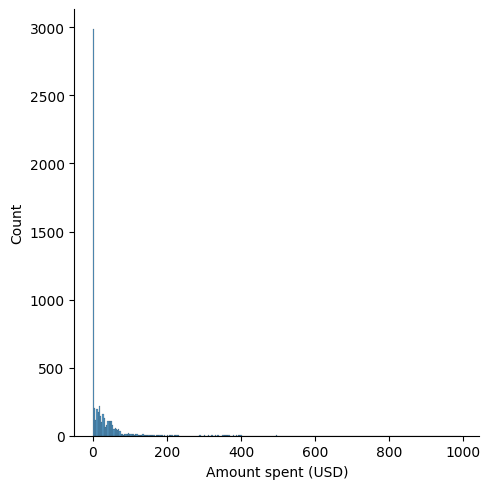

In [59]:
sns.displot(x=df_no_zeroes['Amount spent (USD)'])

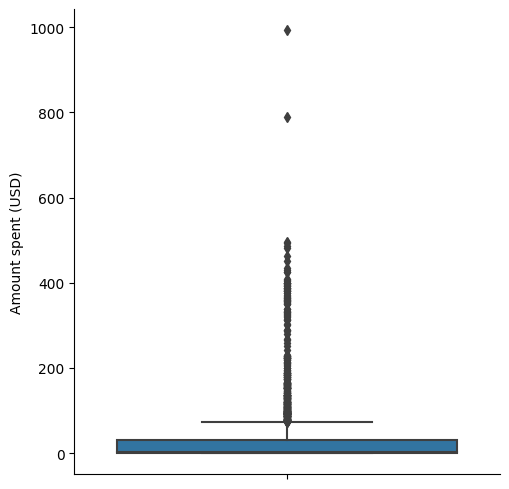

In [60]:
sns.catplot(y='Amount spent (USD)', kind='box', data= df_no_zeroes)

In [61]:
df_no_zeroes['Amount spent (USD)'].describe()

count    5732.000000
mean       23.916015
std        52.686515
min         0.009889
25%         0.090000
50%         2.050000
75%        29.415000
max       993.230000
Name: Amount spent (USD), dtype: float64

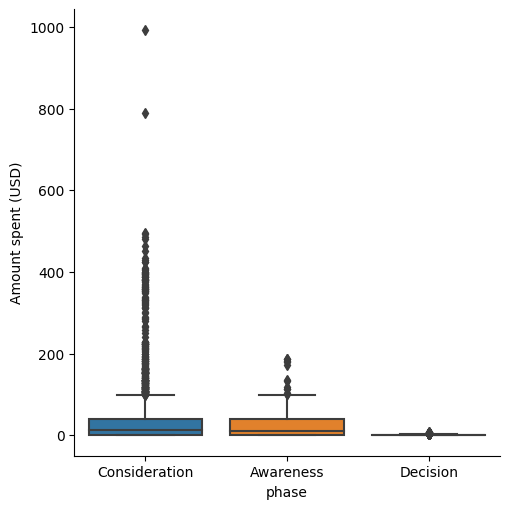

In [19]:
sns.catplot(x='phase', y='Amount spent (USD)', kind='box', data= df_no_zeroes)

In [20]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Amount spent (USD)'].describe()

count    754.000000
mean      20.114695
std       26.830026
min        0.009889
25%        0.060000
50%       12.000000
75%       39.825000
max      187.490000
Name: Amount spent (USD), dtype: float64

In [21]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Amount spent (USD)'].describe()

count    3816.000000
mean       31.619570
std        61.694385
min         0.009974
25%         0.110000
50%        12.670000
75%        39.840000
max       993.230000
Name: Amount spent (USD), dtype: float64

In [22]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Amount spent (USD)'].describe()

count    1162.000000
mean        1.084200
std         1.530303
min         0.010000
25%         0.070000
50%         0.365000
75%         1.387500
max         7.940000
Name: Amount spent (USD), dtype: float64

2. Link clicks

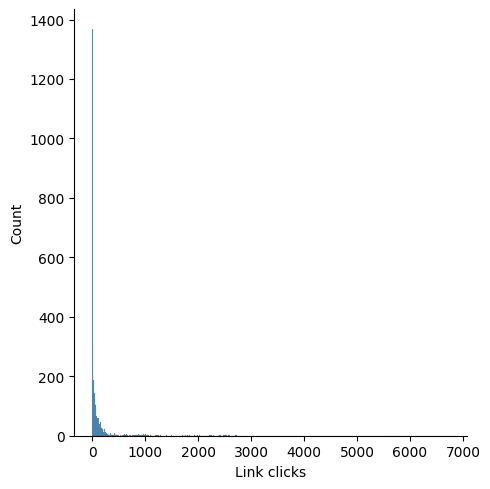

In [23]:
sns.displot(x=df['Link clicks'])

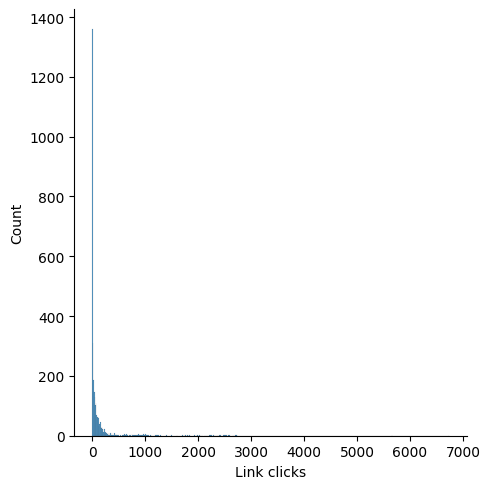

In [24]:
sns.displot(x=df_no_zeroes['Link clicks'])

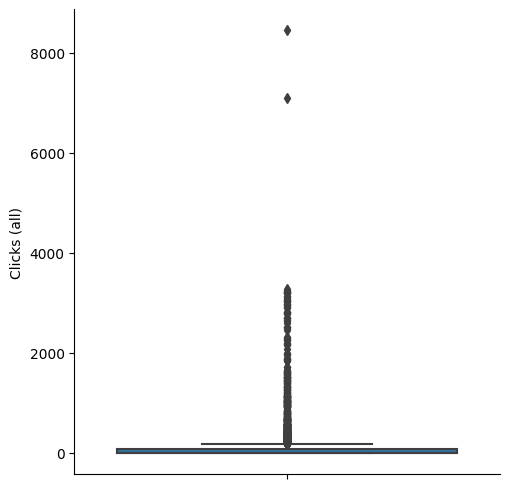

In [34]:
sns.catplot(y='Clicks (all)', kind='box', data= df_no_zeroes)

In [35]:
df_no_zeroes['Clicks (all)'].describe()

count    5732.000000
mean      115.551465
std       359.225404
min         0.000000
25%         0.000000
50%         4.000000
75%        73.250000
max      8455.000000
Name: Clicks (all), dtype: float64

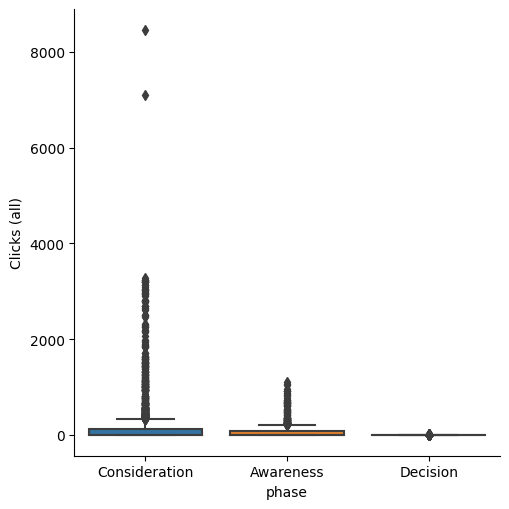

In [62]:
sns.catplot(x='phase', y='Clicks (all)', kind='box', data= df_no_zeroes)

In [63]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Clicks (all)'].describe()

count    3816.000000
mean      154.831499
std       426.901498
min         0.000000
25%         0.000000
50%        15.000000
75%       134.000000
max      8455.000000
Name: Clicks (all), dtype: float64

In [64]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Clicks (all)'].describe()

count     754.000000
mean       91.521220
std       174.751283
min         0.000000
25%         0.000000
50%        12.000000
75%        89.750000
max      1115.000000
Name: Clicks (all), dtype: float64

In [65]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Clicks (all)'].describe()

count    1162.000000
mean        2.148881
std         4.019466
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        40.000000
Name: Clicks (all), dtype: float64

3. Impressions

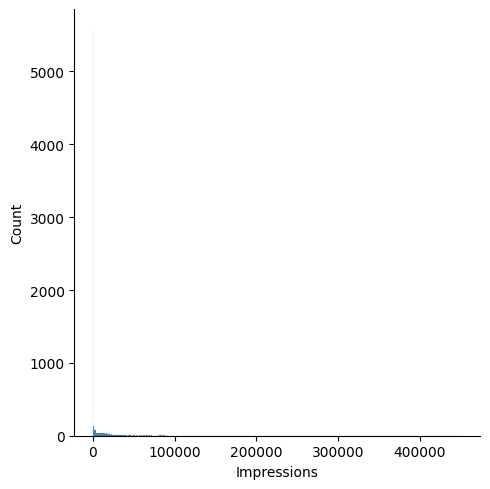

In [66]:
sns.displot(x=df['Impressions'])

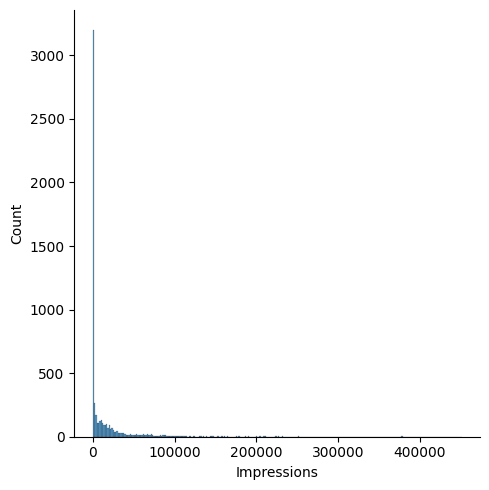

In [67]:
sns.displot(x=df_no_zeroes['Impressions'])

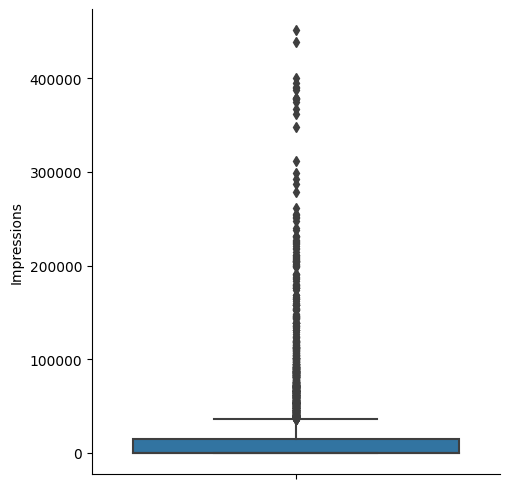

In [68]:
sns.catplot(y='Impressions', kind='box', data= df_no_zeroes)

In [69]:
df_no_zeroes['Impressions'].describe()

count      5732.000000
mean      15134.310014
std       36962.476587
min           1.000000
25%          37.000000
50%         352.500000
75%       14430.000000
max      451247.000000
Name: Impressions, dtype: float64

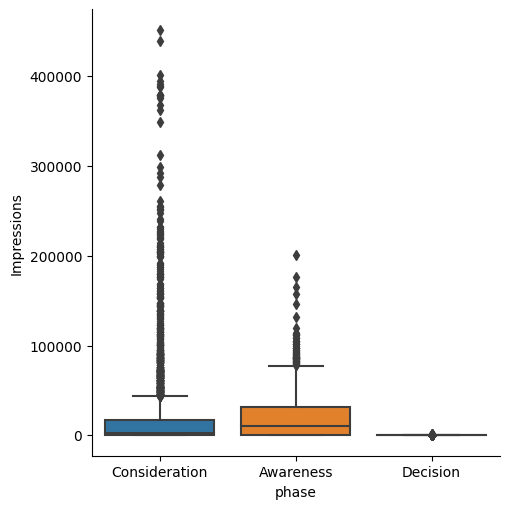

In [70]:
sns.catplot(x='phase', y='Impressions', kind='box', data= df_no_zeroes)

In [79]:
df[df['phase'] == 'Consideration']['Impressions'].describe()

count      5734.000000
mean      12221.274852
std       35553.700832
min           0.000000
25%           1.000000
50%          54.000000
75%        8867.000000
max      451247.000000
Name: Impressions, dtype: float64

In [71]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Impressions'].describe()

count      3816.000000
mean      18363.285115
std       42270.184244
min           1.000000
25%          54.000000
50%        2695.500000
75%       17403.750000
max      451247.000000
Name: Impressions, dtype: float64

In [80]:
df[df['phase'] == 'Awareness']['Impressions'].describe()

count      1284.000000
mean      12866.292835
std       25385.497650
min           0.000000
25%           1.000000
50%          41.000000
75%       15993.500000
max      200310.000000
Name: Impressions, dtype: float64

In [72]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Impressions'].describe()

count       754.000000
mean      21909.197613
std       29993.820654
min           1.000000
25%          69.000000
50%       10191.500000
75%       31233.000000
max      200310.000000
Name: Impressions, dtype: float64

In [73]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Impressions'].describe()

count    1162.000000
mean      134.280551
std       197.743726
min         1.000000
25%         8.000000
50%        47.000000
75%       147.000000
max      1493.000000
Name: Impressions, dtype: float64

## Simple Scatter plotting

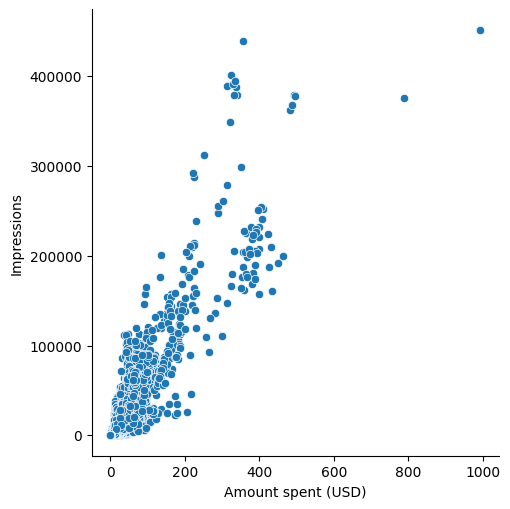

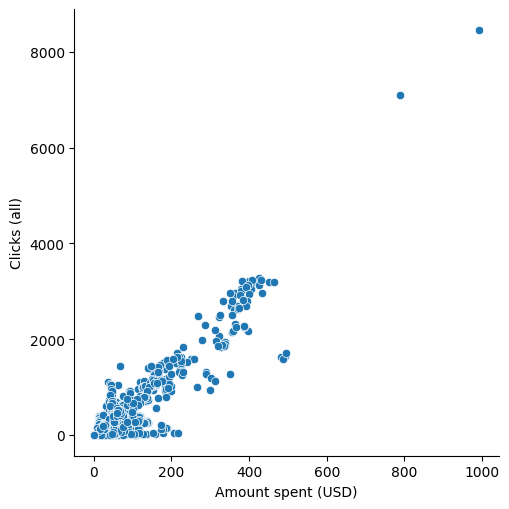

In [74]:
cols=['Impressions', 'Clicks (all)']
for c in cols:
    sns.relplot(x='Amount spent (USD)', y=c, kind='scatter', data=df_no_zeroes)
    plt.show()

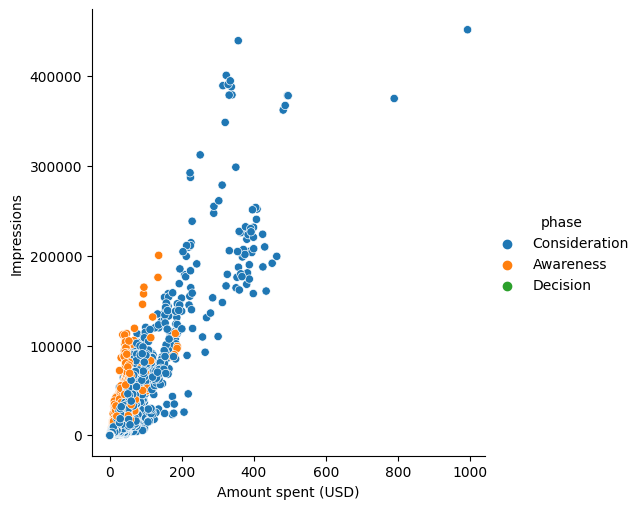

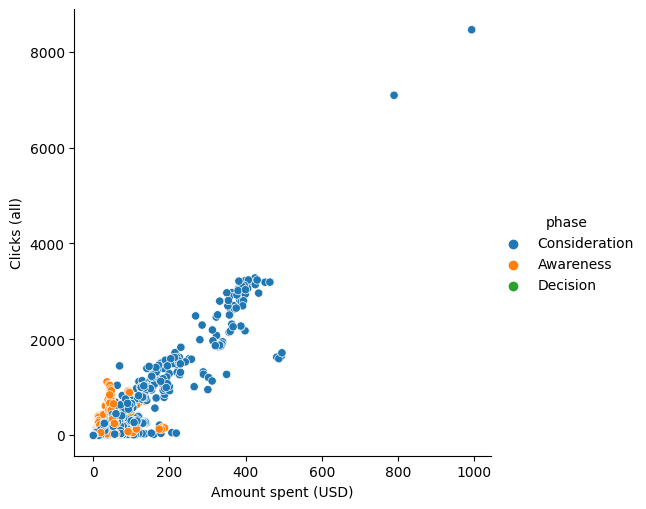

In [50]:
cols=['Impressions', 'Clicks (all)']
for c in cols:
    sns.relplot(x='Amount spent (USD)', y=c, kind='scatter', hue='phase', data=df_no_zeroes)
    plt.show()

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_88953/937001669.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

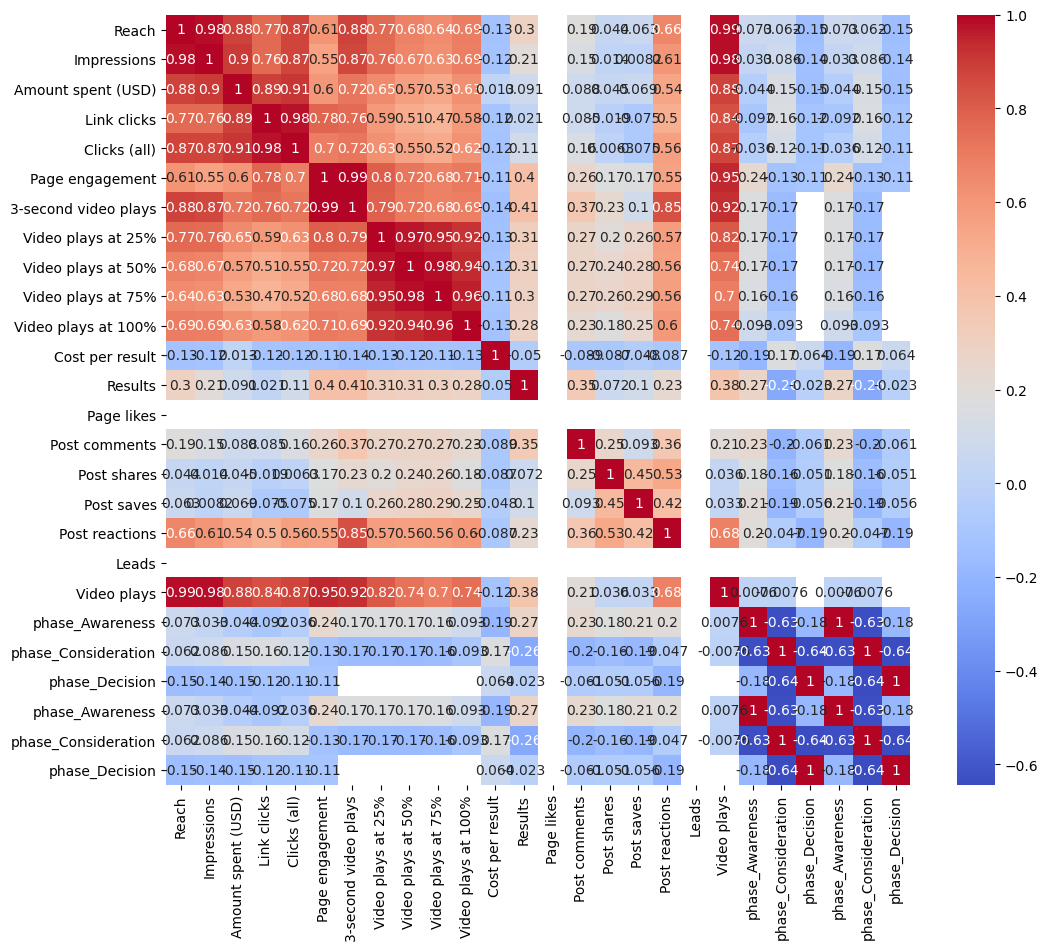

In [75]:
phases= pd.get_dummies(df['phase'], prefix='phase')
df= pd.concat([df, phases], axis=1)

correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

## Line according to time

In [76]:
df['Day']=df['Day'].astype('datetime64[ns]')

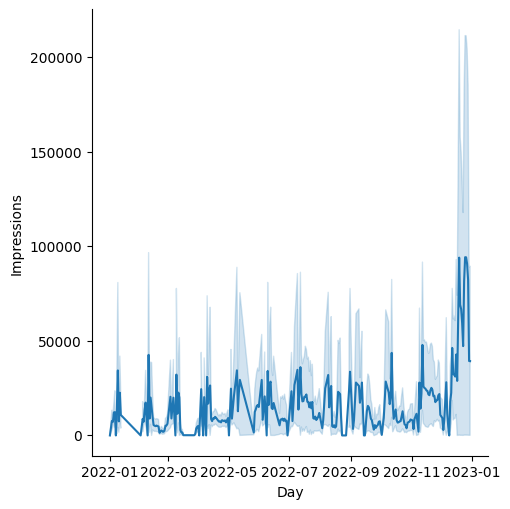

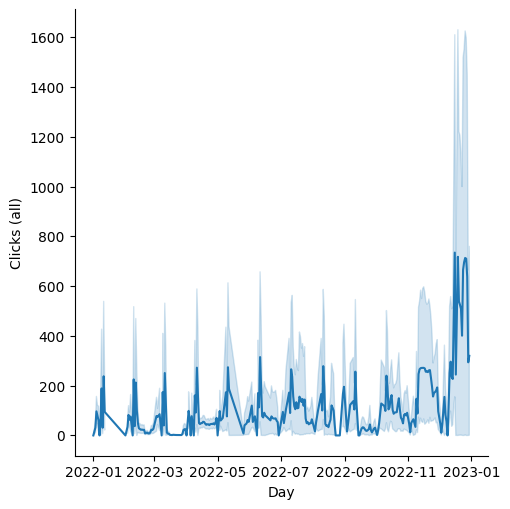

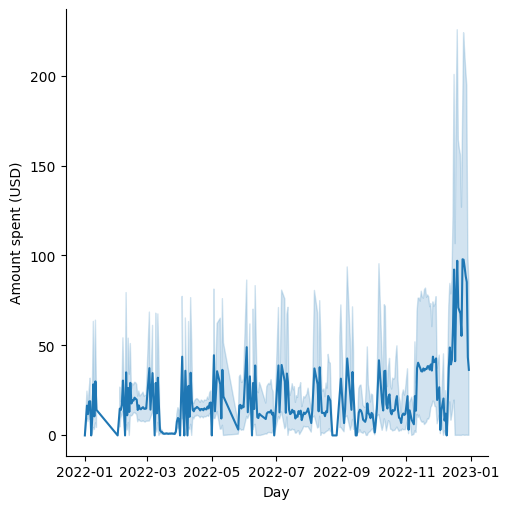

In [77]:
columns=['Impressions', 'Clicks (all)', 'Amount spent (USD)']
for c in columns:
    sns.relplot(x='Day', y=c, data=df, kind='line')

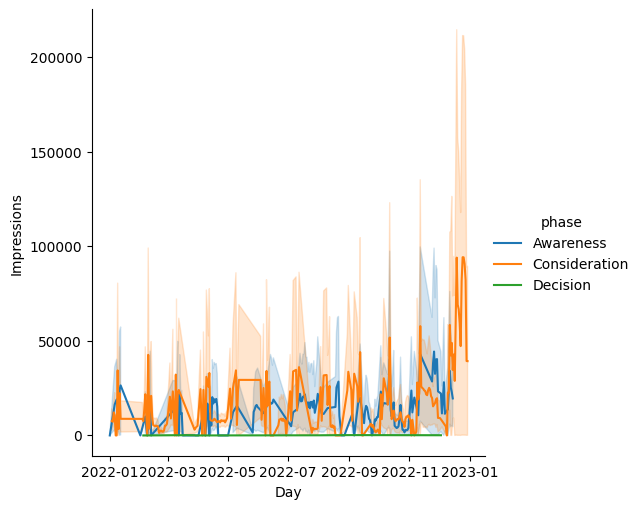

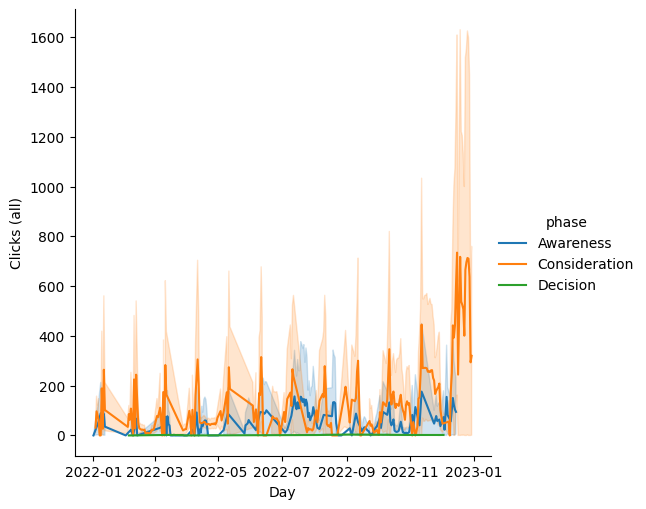

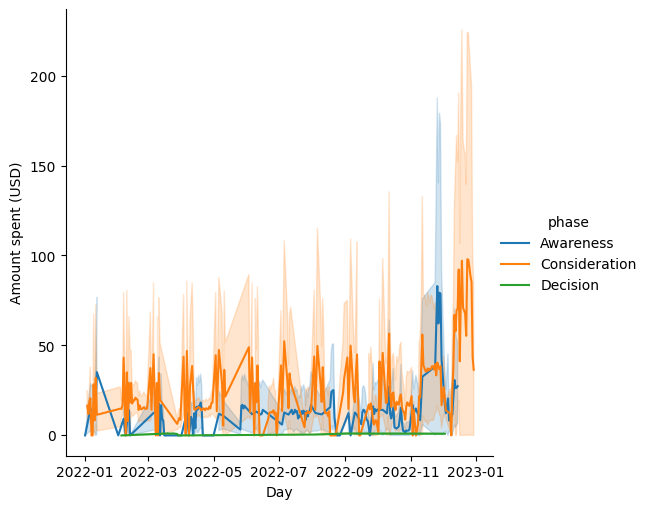

In [78]:
columns=['Impressions', 'Clicks (all)', 'Amount spent (USD)']
for c in columns:
    sns.relplot(x='Day', y=c, hue='phase', data=df, kind='line')

## Formatting the dataset

In [56]:
#Formatting in weekly format

# Group the data by week and calculate the sum of the ad metrics
df_weekly = df.groupby(pd.Grouper(key='Day', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_weekly = df_weekly.reset_index()

# Rename the 'date' column to 'week'
df_weekly = df_weekly.rename(columns={'Day': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_weekly['week_number'] = df_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_88953/2211409721.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(pd.Grouper(key='Day', freq='W-SUN')).sum()
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_88953/2211409721.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_weekly['week_number'] = df_weekly['week_end'].dt.week


,week_end,Reach,Impressions,Amount spent (USD),Link clicks,Clicks (all),Page engagement,3-second video plays,Video plays at 25%,Video plays at 50%,...,Post comments,Post shares,Post saves,Post reactions,Leads,Video plays,phase_Awareness,phase_Consideration,phase_Decision,week_number
0,2022-01-02,0,0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,52
1,2022-01-09,1881435,2605760,3600.570000,7502.0,18854,11458.0,738.0,237.0,131.0,...,26.0,122.0,32.0,2370.0,0.0,11447.0,17,203,0,1
2,2022-01-16,785312,1001966,1339.630000,6889.0,9346,52022.0,44760.0,7808.0,2726.0,...,1.0,13.0,3.0,356.0,0.0,438145.0,17,51,0,2
3,2022-01-23,0,0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3
4,2022-01-30,0,0,0.000000,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,4
5,2022-02-06,1458672,2118157,3445.170000,5775.0,13442,22304.0,14150.0,3681.0,1279.0,...,22.0,124.0,31.0,2202.0,0.0,112043.0,13,179,3,5
6,2022-02-13,1167038,1741340,2430.620000,7741.0,12173,48068.0,39757.0,6458.0,2213.0,...,6.0,21.0,3.0,540.0,0.0,363560.0,19,81,0,6
7,2022-02-20,919516,1461988,5918.980000,3408.0,7056,6604.0,2420.0,696.0,499.0,...,4.0,23.0,17.0,732.0,0.0,30493.0,0,310,0,7
8,2022-02-27,441174,618033,2995.300000,1290.0,2693,4393.0,2775.0,794.0,481.0,...,8.0,21.0,9.0,290.0,0.0,37963.0,0,197,0,8
9,2022-03-06,1045451,1688988,2987.570000,4249.0,9888,19286.0,13913.0,3739.0,1386.0,...,9.0,58.0,22.0,1035.0,0.0,115836.0,9,139,0,9


In [81]:
df_final = df_weekly[['Impressions', 'Clicks (all)', 'Amount spent (USD)', 'week_end', 'week_number']]
df_final= df_final.rename(columns={'Impressions':'impressions_fbig', 'Amount spent (USD)': 'spend_fbig', 'Clicks (all)': 'clicks_fbig'})
df_final

,impressions_fbig,clicks_fbig,spend_fbig,week_end,week_number
0,0,0,0.000000,2022-01-02,52
1,2605760,18854,3600.570000,2022-01-09,1
2,1001966,9346,1339.630000,2022-01-16,2
3,0,0,0.000000,2022-01-23,3
4,0,0,0.000000,2022-01-30,4
5,2118157,13442,3445.170000,2022-02-06,5
6,1741340,12173,2430.620000,2022-02-13,6
7,1461988,7056,5918.980000,2022-02-20,7
8,618033,2693,2995.300000,2022-02-27,8
9,1688988,9888,2987.570000,2022-03-06,9
